In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web
random.seed(42)



/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2020, 1, 1)
dataset = web.DataReader("^GSPC", 'yahoo', start, end)
dataset = dataset.dropna()
dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029


In [3]:
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
dataset.head()

,High,Low,Open,Close,Volume,Adj Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,,,,,,,
2018-01-02,2695.889893,2682.360107,2683.729980,2695.810059,3367250000,2695.810059,13.529785,12.080078,NaN,NaN,NaN,NaN
2018-01-03,2714.370117,2697.770020,2697.850098,2713.060059,3538660000,2713.060059,16.600098,15.209961,NaN,NaN,NaN,NaN
2018-01-04,2729.290039,2719.070068,2719.310059,2723.989990,3695260000,2723.989990,10.219971,4.679932,NaN,NaN,NaN,NaN
2018-01-05,2743.449951,2727.919922,2731.330078,2743.149902,3236620000,2743.149902,15.530029,11.819824,2710.953369,NaN,NaN,NaN
2018-01-08,2748.510010,2737.600098,2742.669922,2747.709961,3242650000,2747.709961,10.909912,5.040039,2726.733317,NaN,NaN,21.450341


In [4]:
X = dataset.drop('Adj Close', axis=1)
y = dataset['Adj Close']
print(X)
y

                   High          Low         Open        Close      Volume  \
Date                                                                         
2018-01-02  2695.889893  2682.360107  2683.729980  2695.810059  3367250000   
2018-01-03  2714.370117  2697.770020  2697.850098  2713.060059  3538660000   
2018-01-04  2729.290039  2719.070068  2719.310059  2723.989990  3695260000   
2018-01-05  2743.449951  2727.919922  2731.330078  2743.149902  3236620000   
2018-01-08  2748.510010  2737.600098  2742.669922  2747.709961  3242650000   
...                 ...          ...          ...          ...         ...   
2019-12-24  3226.429932  3220.510010  3225.449951  3223.379883  1296540000   
2019-12-26  3240.080078  3227.199951  3227.199951  3239.909912  2160680000   
2019-12-27  3247.929932  3234.370117  3247.229980  3240.020020  2428670000   
2019-12-30  3240.919922  3216.570068  3240.090088  3221.290039  3013290000   
2019-12-31  3231.719971  3212.030029  3215.179932  3230.780029  

Date
2018-01-02    2695.810059
2018-01-03    2713.060059
2018-01-04    2723.989990
2018-01-05    2743.149902
2018-01-08    2747.709961
                 ...     
2019-12-24    3223.379883
2019-12-26    3239.909912
2019-12-27    3240.020020
2019-12-30    3221.290039
2019-12-31    3230.780029
Name: Adj Close, Length: 503, dtype: float64

In [5]:
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

In [9]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
41/41 [==============================] - 0s 988us/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/100
41/41 [==============================] - 0s 981us/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/100
41/41 [==============================] - 0s 980us/step - loss: nan - accuracy: 0.00

41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 82/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 83/100
41/41 [==============================] - 0s 974us/step - loss: nan - accuracy: 0.0000e+00
Epoch 84/100
41/41 [==============================] - 0s 977us/step - loss: nan - accuracy: 0.0000e+00
Epoch 85/100
41/41 [==============================] - 0s 998us/step - loss: nan - accuracy: 0.0000e+00
Epoch 86/100
41/41 [==============================] - 0s 963us/step - loss: nan - accuracy: 0.0000e+00
Epoch 87/100
41/41 [==============================] - 0s 941us/step - loss: nan - accuracy: 0.0000e+00
Epoch 88/100
41/41 [==============================] - 0s 944us/step - loss: nan - accuracy: 0.0000e+00
Epoch 89/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 90/100
41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.

In [10]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [11]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

In [12]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [13]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


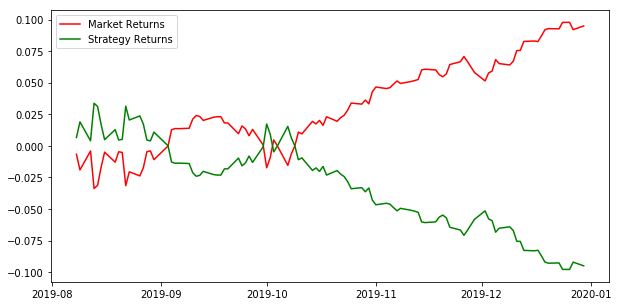

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()